# Project Scope

Working on a popular Fashion MNIST dataset for this project. The dataset includes tiny images of fashion pieces. The objective is to create a set of supervised learning models that can predict the type of item based on its image.

In order to load the dataset, installing `tensorflow V2`.

In [1]:
!pip install --upgrade tensorflow

Check the version of it.

In [1]:
import tensorflow as tf
tf.__version__

'2.10.0'

Now, it's time to load the dataset

In [2]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [3]:
X_train.shape

(60000, 28, 28)

As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. Visualizing one of the images using the following code:

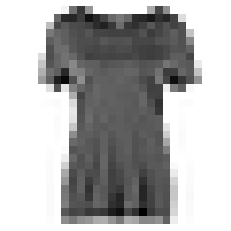

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[10]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, checking the value of `y_train` for the above image.

In [5]:
y_train[10]

0

The above code shows that the image belongs to category 0. To get the associated label with each category, using the following code:

In [6]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[10]])

T-shirt/top


# Reshaping 3 dimension data to 2 dimension

In [7]:
#Reshaping the dataset to 2 dimensional since it is 3 dimensional
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


# Logistics Regression

In [8]:
#Since there is no numeric  value, so applying logistics regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',max_iter=500) #Defined the maximum iteration to 500

#Fiting the train dataset to model
model.fit(X_train, y_train)

#Prediting the model
y_test_hat = model.predict(X_test)
y_test_hat

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([9, 2, 1, ..., 6, 1, 5], dtype=uint8)

In [9]:
#Importing required libraries 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

#Printing accuracy and AUC score which will help to determine the model performance
Accuracy_Score = accuracy_score(y_test,y_test_hat, normalize = True) * 100
model_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr') 
print("AUC for logisticsRegression: {:.3f}".format(model_auc))
print('Accuracy Score for logisticsRegression:', Accuracy_Score)

AUC for logisticsRegression: 0.982
Accuracy Score for logisticsRegression: 83.69


In [10]:
#Plotting confusion matrix to understand the performance of a classifier
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,y_test_hat))
print(classification_report(y_test,y_test_hat))

Confusion Matrix
[[793   6   9  54  10   0 114   0  14   0]
 [  3 958   5  26   3   0   3   0   2   0]
 [ 23   5 728   7 135   0  89   1  12   0]
 [ 29  20  21 844  36   0  39   0  11   0]
 [  2   2 104  36 775   0  72   0   9   0]
 [  0   0   0   1   0 896   0  51  12  40]
 [136   3 121  39 115   0 564   0  22   0]
 [  0   0   0   0   0  36   0 937   0  27]
 [  9   1   9  14   5   8  22   5 927   0]
 [  0   1   0   0   0  16   1  35   0 947]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1000
           1       0.96      0.96      0.96      1000
           2       0.73      0.73      0.73      1000
           3       0.83      0.84      0.84      1000
           4       0.72      0.78      0.75      1000
           5       0.94      0.90      0.92      1000
           6       0.62      0.56      0.59      1000
           7       0.91      0.94      0.92      1000
           8       0.92      0.93      0.92      1000
           

# Gaussian Naive Bayes

In [11]:
#deploying another supervised learning model to 
from sklearn.naive_bayes import GaussianNB 
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

y_test_hat_nb = model_nb.predict(X_test)

In [12]:
y_test_hat

array([9, 2, 1, ..., 6, 1, 5], dtype=uint8)

In [13]:
#Printing accuracy and AUC score to determine the model performance
Accuracy_Score_GNB = accuracy_score(y_test,y_test_hat, normalize = True) * 100
model_nb_auc = roc_auc_score(y_test, model_nb.predict_proba(X_test), multi_class='ovr') 
print("AUC for GaussianNB: {:.3f}".format(model_nb_auc))
print('Accuracy Score for GaussianNB:', Accuracy_Score_GNB)

AUC for GaussianNB: 0.895
Accuracy Score for GaussianNB: 83.69


In [14]:
print("Confusion Matrix")
print(confusion_matrix(y_test,y_test_hat))
print(classification_report(y_test,y_test_hat))

Confusion Matrix
[[793   6   9  54  10   0 114   0  14   0]
 [  3 958   5  26   3   0   3   0   2   0]
 [ 23   5 728   7 135   0  89   1  12   0]
 [ 29  20  21 844  36   0  39   0  11   0]
 [  2   2 104  36 775   0  72   0   9   0]
 [  0   0   0   1   0 896   0  51  12  40]
 [136   3 121  39 115   0 564   0  22   0]
 [  0   0   0   0   0  36   0 937   0  27]
 [  9   1   9  14   5   8  22   5 927   0]
 [  0   1   0   0   0  16   1  35   0 947]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1000
           1       0.96      0.96      0.96      1000
           2       0.73      0.73      0.73      1000
           3       0.83      0.84      0.84      1000
           4       0.72      0.78      0.75      1000
           5       0.94      0.90      0.92      1000
           6       0.62      0.56      0.59      1000
           7       0.91      0.94      0.92      1000
           8       0.92      0.93      0.92      1000
           

# KNN(Grid Search with Cross-Validation) Model

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


model_knn=KNeighborsClassifier()
param_grid={'n_neighbors': [1,2,3,4,5,6]}
cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid=GridSearchCV(model_knn, param_grid, cv=cv, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)
y_test_hat=grid.predict(X_test)
y_train_hat=grid.predict(X_train)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

Best Parameter: {'n_neighbors': 4}
Best Cross Vlidation Score: 0.8570166666666665


In [20]:
model_knn_auc = roc_auc_score(y_test, grid.predict_proba(X_test), multi_class='ovr') 

print("Accuracy score for KNN:", accuracy_score(y_test, y_test_hat, normalize=True)*100)
print("AUC for KNN: {:.3f}".format(model_knn_auc))

#Printing the confusion matrix to visualize important predictive analytics like recall, specificity, accuracy, and precision
print("Confusion Matrix")
cf_matrix_knn = confusion_matrix(y_test,y_test_hat)
print(cf_matrix_knn)
print(classification_report(y_test,y_test_hat))

Accuracy score for KNN: 85.77
AUC for KNN: 0.965
Confusion Matrix
[[886   1  20  14   3   1  72   1   2   0]
 [  8 971   3  10   4   0   3   0   1   0]
 [ 27   2 831  11  69   0  60   0   0   0]
 [ 48   7  15 868  25   0  34   0   3   0]
 [  4   1 151  32 743   0  67   0   2   0]
 [  2   0   0   0   0 855   4  77   0  62]
 [198   2 143  22  79   0 545   0  11   0]
 [  0   0   0   0   0   4   0 971   0  25]
 [  3   0  13   3   5   0  18   7 951   0]
 [  0   0   0   0   0   1   1  42   0 956]]
              precision    recall  f1-score   support

           0       0.75      0.89      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.71      0.83      0.76      1000
           3       0.90      0.87      0.89      1000
           4       0.80      0.74      0.77      1000
           5       0.99      0.85      0.92      1000
           6       0.68      0.55      0.60      1000
           7       0.88      0.97      0.93      1000
           8    

# Decision Tree(Grid Search with Cross-Validation) Model

In [22]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.manifold import Isomap

model_dt=DecisionTreeClassifier()
param_grid={'max_depth': [5,6,7,9]}
cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid=GridSearchCV(model_dt, param_grid, cv=cv, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)
y_test_hat=grid.predict(X_test)
y_train_hat=grid.predict(X_train)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

Best Parameter: {'max_depth': 9}
Best Cross Vlidation Score: 0.8027333333333333


In [23]:
model_dt_auc = roc_auc_score(y_test, grid.predict_proba(X_test), multi_class='ovr') 

print("Accuracy score for Decision Tree:", accuracy_score(y_test, y_test_hat, normalize=True)*100)
print("AUC for Decision Tree: {:.3f}".format(model_dt_auc))

#Printing the confusion matrix to visualize important predictive analytics like recall, specificity, accuracy, and precision
print("Confusion Matrix")
cf_matrix_dt = confusion_matrix(y_test,y_test_hat)
print(cf_matrix_dt)
print(classification_report(y_test,y_test_hat))

Accuracy score for Decision Tree: 79.79
AUC for Decision Tree: 0.963
Confusion Matrix
[[773   2  30  44   8   3 125   1  14   0]
 [ 11 917   6  44   7   1  10   0   3   1]
 [ 11   0 680  11 210   0  77   0  11   0]
 [ 34   5  29 805  74   4  42   0   7   0]
 [  3   0 138  43 712   0 102   0   2   0]
 [  1   1   1   2   0 873   0  77  18  27]
 [141   1 161  43 136   4 496   0  18   0]
 [  0   0   0   0   0  28   0 935   4  33]
 [  2   1  21   8  20   6  34  12 895   1]
 [  0   0   1   0   0  16   3  84   3 893]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1000
           1       0.99      0.92      0.95      1000
           2       0.64      0.68      0.66      1000
           3       0.81      0.81      0.81      1000
           4       0.61      0.71      0.66      1000
           5       0.93      0.87      0.90      1000
           6       0.56      0.50      0.53      1000
           7       0.84      0.94      0.89      1

# Random Forest(Grid Search with Cross-Validation) Model

In [24]:
from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier()
param_grid={'max_depth':[5,6,7,9], 'n_estimators':[100, 300, 500]}
cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid=GridSearchCV(model_rf, param_grid, cv=cv, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)
y_test_hat=grid.predict(X_test)
y_train_hat=grid.predict(X_train)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

Best Parameter: {'max_depth': 9, 'n_estimators': 300}
Best Cross Vlidation Score: 0.8450333333333333


In [26]:
model_rf_auc = roc_auc_score(y_test, grid.predict_proba(X_test), multi_class='ovr') 

print("Accuracy score for Random Forest:", accuracy_score(y_test, y_test_hat, normalize=True)*100)
print("AUC for Random Forest: {:.3f}".format(model_rf_auc))

#Printing the confusion matrix to visualize important predictive analytics like recall, specificity, accuracy, and precision
print("Confusion Matrix")
cf_matrix_rf = confusion_matrix(y_test,y_test_hat)
print(cf_matrix_rf)
print(classification_report(y_test,y_test_hat))

Accuracy score for Random Forest: 83.75
AUC for Random Forest: 0.984
Confusion Matrix
[[820   1  22  65   6   1  70   0  15   0]
 [  3 935   9  40   5   0   6   0   2   0]
 [  7   0 713   8 218   0  49   0   5   0]
 [ 23   1  16 895  38   0  25   0   2   0]
 [  0   1  98  49 803   0  46   0   3   0]
 [  0   0   0   1   0 927   0  51   2  19]
 [198   1 154  45 120   0 463   0  19   0]
 [  0   0   0   0   0   8   0 920   0  72]
 [  0   1  17   5   6   2   6   4 958   1]
 [  0   0   0   0   0   6   1  50   2 941]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1000
           1       0.99      0.94      0.96      1000
           2       0.69      0.71      0.70      1000
           3       0.81      0.90      0.85      1000
           4       0.67      0.80      0.73      1000
           5       0.98      0.93      0.95      1000
           6       0.70      0.46      0.56      1000
           7       0.90      0.92      0.91      1

I have used five supervised learning algorithms for image classification in Fashion MNIST dataset and calculated few performance metrics for 
metrics in order to evaluate the models.

# Models comparison details

 Models                                    Accuracy        Precision        Recall        Roc_auc score  

 Logistic Regression Model:                      83.69            0.84            0.84            0.9820
 Gaussian Naive Bayes Model:                     83.69            0.84            0.84            0.8950  
 KNN Model:                                      85.77            0.86            0.86            0.9650 
 Decision Tree Model:                            79.79            0.80            0.80            0.9630
 Random Forest Model:                            83.75            0.84            0.84            0.9840

 After applying 5 supervised learning model, K-Nearest Neighbors seems the best model to predict because it has the Accuracy score of 85.77 and Precision and Recall 86.00, 86.00 respectively and AUC Score 96.50, which seems a great model score as against all other models. Hence, I would select KNN as my best model

# Predicting own fashions using trained model

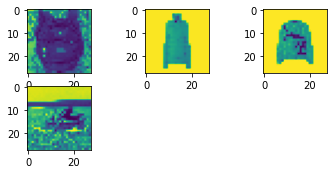

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import os


#Resizing all the images, and grayscaling
allimagefolder='./image_prediction/'
image_frame=pd.DataFrame()
for i in enumerate(os.listdir(allimagefolder)):
    plt.subplot(330+1+i[0])
    picture=cv2.imread(allimagefolder+i[1])
    resized_pictures=cv2.resize(picture, (28, 28))
    gs_picture=cv2.cvtColor(resized_pictures, cv2.COLOR_BGR2GRAY)
    gs_picture_test=np.reshape(gs_picture,[1,784])
    picture=pd.DataFrame(gs_picture_test)
    plt.imshow(gs_picture)
    image_frame=pd.concat([image_frame, picture])

In [14]:
# Using KNN the best model to predict own fashion pieces.
from sklearn.neighbors import KNeighborsClassifier

model_knn= KNeighborsClassifier(n_neighbors=9)
model_knn.fit(X_train, y_train);

y_test=[4, 8, 7, 0]

y_test_hat  = model_knn.predict(image_frame)
y_test_hat

array([2, 8, 8, 2], dtype=uint8)

In [15]:
print(accuracy_score(y_test, y_test_hat, normalize=True)*100)

25.0


# Conclusion:

After traning the models and fitting own fasion images to the best trained model it can be observed, although the model is not too accurate, but it is able to classify some images accurately. 